In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# parameters
x_L, x_R = -10.0, 10.0
N = 400
dx = (x_R - x_L) / N
dt = 0.4 * dx**2       
T = 5.0
steps = int(T / dt)

x = np.linspace(x_L, x_R, N+1)
u = np.where(x < 0, 1.0, 0.0)   


In [3]:
for n in range(steps):
    u_new = u.copy()

    for i in range(1, N):
        lap = (u[i+1] - 2*u[i] + u[i-1]) / dx**2
        reaction = u[i] * (1.0 - u[i])
        u_new[i] = u[i] + dt * (lap + reaction)

    # boundary
    u_new[0] = 1.0
    u_new[N] = 0.0

    u = u_new


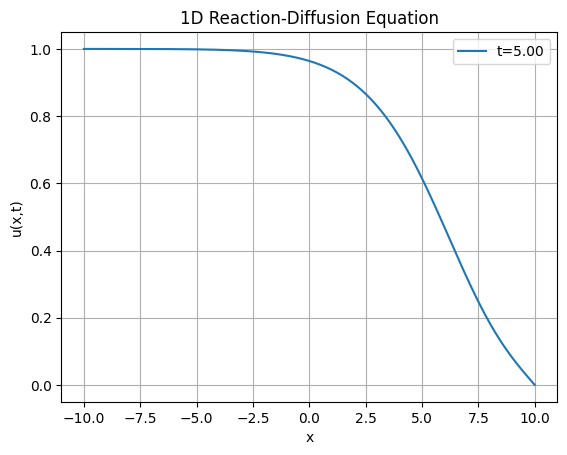

In [4]:
# plot the final result

plt.plot(x, u, label='t={:.2f}'.format(T))
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title('1D Reaction-Diffusion Equation')
plt.legend()
plt.grid()
plt.show()
